In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv('/content/drive/My Drive/Subway/kaggle_movie_train.csv')

In [3]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [4]:
df.shape

(22579, 3)

In [5]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


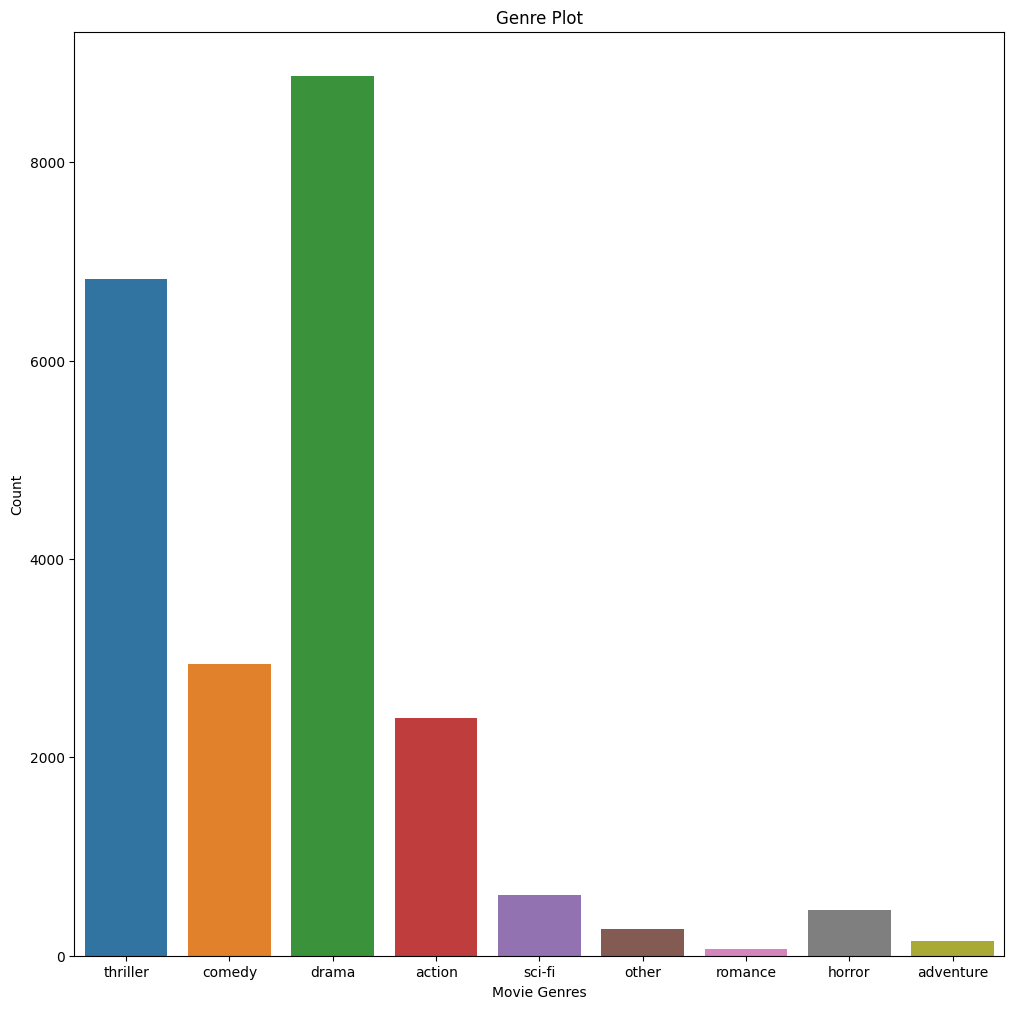

In [6]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

In [7]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [8]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3,
                'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [9]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [10]:
df.drop('id', axis=1, inplace=True)

In [11]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i]) # Cleaning special character from the dialog/script
    dialog = dialog.lower() # Converting the entire dialog/script into lower case
    words = dialog.split() # Tokenizing the dialog/script by words
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))] # Removing the stop words
    words = [ps.stem(word) for word in dialog_words] # Stemming the words
    dialog = ' '.join(words) # Joining the stemmed words
    corpus.append(dialog) # Creating a corpus

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [13]:
y = df['genre'].values

In [14]:
# @title Default title text
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


In [15]:

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [16]:
nb_y_pred = nb_classifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [18]:
def genre_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

In [19]:
test = pd.read_csv('/content/drive/My Drive/Subway/kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [20]:
test.drop('id', axis=1, inplace=True)

In [21]:
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  you wouldn't do anything bad. KASTLE Thank you, sweetheart. turns to Breeze See that you pinheads! Character witness. with sweeping head gesture They're all character witnesses! he sees Theo Thanks to Buzz Fazeli, bowling is dead in this town! He KILLED it! The two officers hustle Kastle towards the van. Theo steps out in front of him. KASTLE between clenched teeth You fool, we could have done great things together! THEO Where's Junior? KASTLE He killed your stoolie embezzler father, and he's gonna kill you next! Sid and Breeze push him towards the van as the crowd's MURMUR increases. Kastle turns and yells over his shoulder. KASTLE shouting Lock your daughters up, ladies! Junior's out there! Mothers and daughters send out a cacophony of screams and scatter for their cars. The BP cops hoist Kastle into the back of the van. Sid slams the doors shut. The van screeches off, sirens wailing. Sid and Breeze walk up to Theo. BREEZE Sorry about your loss. THEO shaking his head I shoul

In [22]:
lr_classifier = LogisticRegression(max_iter=1000)

# Fit the Logistic Regression model
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set
lr_y_pred = lr_classifier.predict(X_test)

# Calculate accuracy score
score2 = accuracy_score(y_test, lr_y_pred)
print("---- Score ----")
print("Accuracy score for Logistic Regression is: {}%".format(round(score2 * 100, 2)))

def genre_prediction_lr(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return lr_classifier.predict(temp)[0]

test = pd.read_csv('/content/drive/My Drive/Subway/kaggle_movie_test.csv')
test.drop('id', axis=1, inplace=True)

from random import randint
row = randint(0, test.shape[0] - 1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction_lr(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

---- Score ----
Accuracy score for Logistic Regression is: 91.52%
Script: l like a can opener. DE VRIES Jesus! THOMAS raises his rifle and looses a fusillade of shots through the roof. One of them RICOCHETS off the interior, SHATTERING the windscreen. There's a THUMP from outside... DE VRIES CONT'D You got 'im! Their triumph is short lived. Globules of yellow acid perforate the roof like Swiss cheese, dripping down on them. GUTTIEREZ floors the brakes. The crawler swings through ninety degrees before SCREECHING to a halt. INT. RYUSHI STATION COMMAND CENTER CASSIE enters admin at a run. Before, it was empty. Now it's sheer chaos. She shoves her way through dozens of grim faced people. PARSONS is standing at a console, YELLING into his headset. PARSONS Seal everything now! CASSIE What's happening? PARSONS Cassie, thank Christ! We're under attack. CASSIE We're what!? York races in, SHOUTING above the clamor. YORK The son of bitches got into 'E' wing! They're ripping it apart! PARSONS Fuck

In [23]:
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_classifier.predict(X_test)

# Calculate accuracy score
score3 = accuracy_score(y_test, svm_y_pred)
print("---- Score ----")
print("Accuracy score for Support Vector Machine is: {}%".format(round(score3 * 100, 2)))

def genre_prediction_svm(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return svm_classifier.predict(temp)[0]

test = pd.read_csv('/content/drive/My Drive/Subway/kaggle_movie_test.csv')
test.drop('id', axis=1, inplace=True)

from random import randint
row = randint(0, test.shape[0] - 1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction_svm(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

---- Score ----
Accuracy score for Support Vector Machine is: 90.46%
Script: ON WORKER over loudspeaker Pull 'er ahead and park. NEW ANGLE as Cledus leans across Fred and rolls down the window. CLEDUS yelling through window What's the problem? The other WORKER starts out of the shack, followed by one of the Georgia Highway Patrolmen. WEIGHT STATION WORKER over loudspeaker Just pull it over, please. And have your manifest ready. CLEDUS under his breath Oh, Jesus... Cledus pulls the big eighteen wheeler off the scales and into the inspection area. The other Weight Station Worker and the Georgia Cop approach the truck. Cledus hands them his manifest. The Weight Station Worker checks it out. The Highway Patrolman looks over his shoulder. WEIGHT STATION WORKER Paint, huh? CLEDUS Yep. WEIGHT STATION WORKER Paint ain't usually pulled independently. CLEDUS Hey, I'm a truckin' whore. They got the money, honey I got the time. The Weight Station Worker laughs. The Highway Patrolman doesn't. HIGHW